# Import initial data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import collections

#import data
datasetpath = 'initialdata.csv'
dataset = pd.read_csv(datasetpath)

data_type = np.array(dataset['type'])
data_lobular_speciticular = np.array(dataset['lobular_speciticular'])
data_air_bronchus_sign = np.array(dataset['air_bronchus_sign'])
data_vessel_passthrough = np.array(dataset['vessel_passthrough'])
data_long_diameter = np.array(dataset['long_diameter'])
data_avarage_CT_value = np.array(dataset['avarage_CT_value'])
data_gender = np.array(dataset['gender'])
data_age = np.array(dataset['age'])
data_smoking_years = np.array(dataset['smoking_years'])


# Visualise the  distribution of pathology subtype

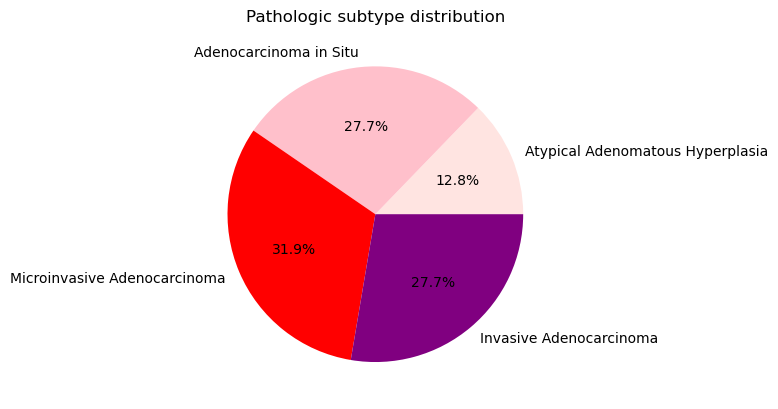

In [4]:
type_count=collections.Counter(data_type)                           #count the numbers of four types
#draw a pie graph
plt.pie([type_count[1], type_count[2], type_count[3], type_count[4]], \
        labels = ['Atypical Adenomatous Hyperplasia', 'Adenocarcinoma in Situ', 'Microinvasive Adenocarcinoma', 'Invasive Adenocarcinoma'], \
        colors = ['mistyrose', 'pink', 'red', 'purple'], \
        autopct='%1.1f%%')
plt.title('Pathologic subtype distribution')
plt.show()

# Visualise the distribution of three CT signs

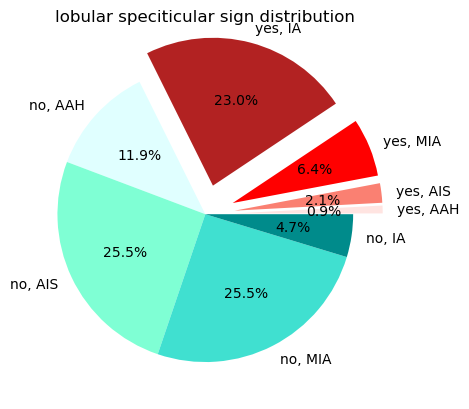

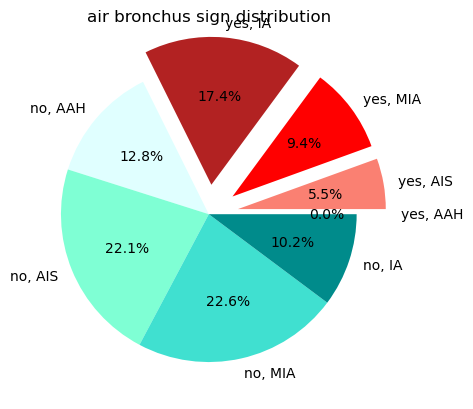

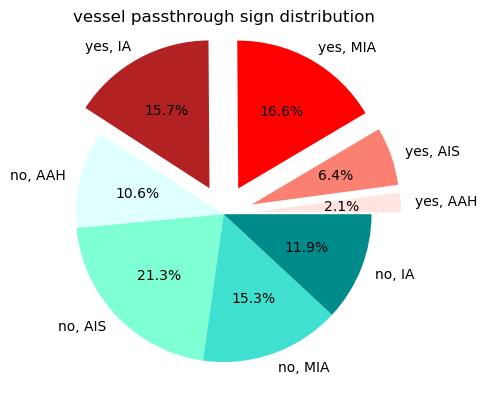

In [3]:
#define a common function to count of different pathologic subtypes with or without different signs 
def count_boolen_parameters(parametername):    
    boolenyescountarray = np.zeros([4])           #an array to count the number of four pathologic subtypes with the image sign
    boolennocountarray = np.zeros([4])           #an array to count the number of four pathologic subtypes without the image sign
    for i in range(235):
        for j in range(4):
            if data_type[i] == j+1:
                if parametername[i] == 0:
                    boolennocountarray[j] += 1
                else:
                    boolenyescountarray[j] += 1
    return boolenyescountarray, boolennocountarray

#define a common function to draw the graph with a pie graph, red means signs+, blue means signs-, deeper color means more malignant
def visualise_boolen_parameter(boolenyescountarray, boolennocountarray, pltpiegraphname):
    plt.pie([boolenyescountarray[0], boolenyescountarray[1], boolenyescountarray[2], boolenyescountarray[3], \
            boolennocountarray[0], boolennocountarray[1], boolennocountarray[2], boolennocountarray[3]], \
            labels = ['yes, AAH', 'yes, AIS', 'yes, MIA', 'yes, IA', \
                      'no, AAH', 'no, AIS', 'no, MIA', 'no, IA'], \
            colors = ['mistyrose', 'salmon', 'red', 'firebrick', \
                      'lightcyan', 'aquamarine', 'turquoise', 'darkcyan'], \
            explode = [0.2, 0.2, 0.2, 0.2, 0, 0, 0, 0], \
            autopct='%1.1f%%')
        
    plt.title(pltpiegraphname)
    plt.show()
    
# lobular speciticular sign
lobular_speciticular_yes, lobular_speciticular_no = count_boolen_parameters(data_lobular_speciticular)
#print(lobular_speciticular_yes)
#print(lobular_speciticular_no)
visualise_boolen_parameter(lobular_speciticular_yes, lobular_speciticular_no, 'lobular speciticular sign distribution')

# air bronchus sign
air_bronchus_sign_yes, air_bronchus_sign_no = count_boolen_parameters(data_air_bronchus_sign)
#print(air_bronchus_sign_yes)
#print(air_bronchus_sign_no)
visualise_boolen_parameter(air_bronchus_sign_yes, air_bronchus_sign_no, 'air bronchus sign distribution')

# vessle passthrough sign
vessel_passthrough_yes, vessel_passthrough_no = count_boolen_parameters(data_vessel_passthrough)
#print(vessel_passthrough_yes)
#(vessel_passthrough_no)
visualise_boolen_parameter(vessel_passthrough_yes, vessel_passthrough_no, 'vessel passthrough sign distribution')


# Visualise the CT values and diameter

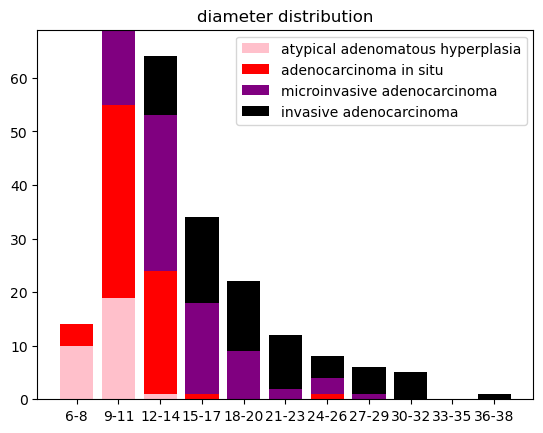

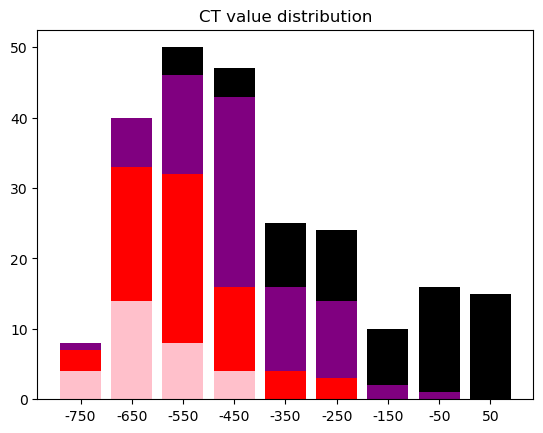

In [5]:
#visualise diameter
#count numbers of different CT values with different pathologic subtypes
type_1_count = np.zeros([11])
type_2_count = np.zeros([11])
type_3_count = np.zeros([11])
type_4_count = np.zeros([11])
for i in range (235):
    if data_type[i] == 1:
        b = int(data_long_diameter[i] // 3)
        type_1_count[b-1] +=1
    elif data_type[i] == 2:
        b = int(data_long_diameter[i] // 3)
        type_2_count[b-1] +=1
    elif data_type[i] == 3:
        b = int(data_long_diameter[i] // 3)
        type_3_count[b-1] +=1
    elif data_type[i] == 4:
        b = int(data_long_diameter[i] // 3)
        type_4_count[b-1] +=1
#print(type_1_count, type_2_count, type_3_count, type_4_count)
columnnames = []
for i in range(11):
    columnnames.append(str(3*(i+2)) + '-' + str(3*(i+3)-1))
#print(columnnames)
#draw the bar graph
plt.bar(columnnames, type_1_count, bottom=0, color='pink', label = 'atypical adenomatous hyperplasia')
plt.bar(columnnames, type_2_count, bottom=type_1_count, color='red', label = 'adenocarcinoma in situ')
plt.bar(columnnames, type_3_count, bottom=type_2_count+type_1_count, color='purple', label = 'microinvasive adenocarcinoma')
plt.bar(columnnames, type_4_count, bottom=type_3_count+type_2_count+type_1_count, color='black', label = 'invasive adenocarcinoma')
plt.title('diameter distribution')
plt.legend()
plt.show()

#visualise CT value
#count numbers
type_1_count = np.zeros([9])
type_2_count = np.zeros([9])
type_3_count = np.zeros([9])
type_4_count = np.zeros([9])
for i in range (235):
    if data_type[i] == 1:
        b = data_avarage_CT_value[i] // 100
        type_1_count[b+8] +=1
    elif data_type[i] == 2:
        b = data_avarage_CT_value[i] // 100
        type_2_count[b+8] +=1
    elif data_type[i] == 3:
        b = data_avarage_CT_value[i] // 100
        type_3_count[b+8] +=1
    elif data_type[i] == 4:
        b = data_avarage_CT_value[i] // 100
        type_4_count[b+8] +=1
#print(type_1_count, type_2_count, type_3_count, type_4_count)
columnnames = []
for i in range(9):
    columnnames.append(str(100*(i-8)+50))
#print(columnnames)
#draw bar graph
plt.bar(columnnames, type_1_count, bottom=0, color='pink')
plt.bar(columnnames, type_2_count, bottom=type_1_count, color='red')
plt.bar(columnnames, type_3_count, bottom=type_2_count+type_1_count, color='purple')
plt.bar(columnnames, type_4_count, bottom=type_3_count+type_2_count+type_1_count, color='black')
plt.title('CT value distribution')
#plt.legend()
plt.show()

# Visualise gender and age

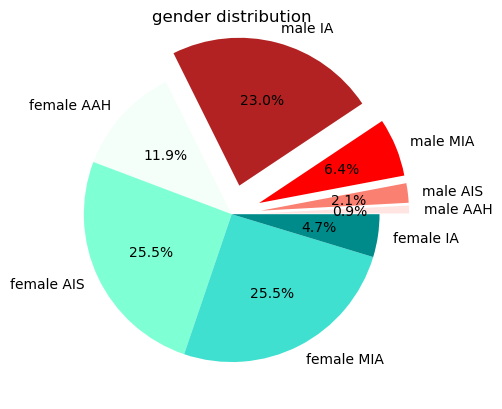

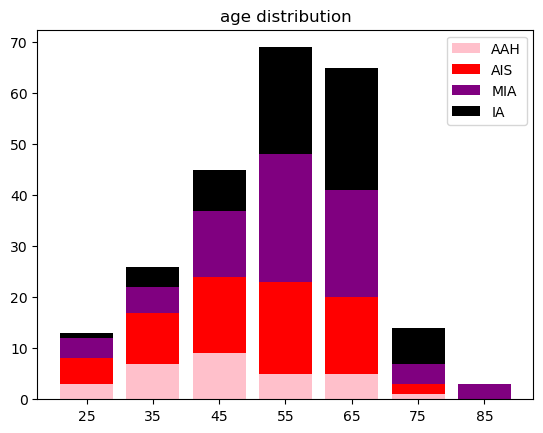

In [6]:
#gender
gendermale, genderfemale = count_boolen_parameters(data_gender)               #count numbers with the above-mentioned count function
#draw pie graph
plt.pie([lobular_speciticular_yes[0], lobular_speciticular_yes[1], lobular_speciticular_yes[2], lobular_speciticular_yes[3], \
        lobular_speciticular_no[0], lobular_speciticular_no[1], lobular_speciticular_no[2], lobular_speciticular_no[3]], \
        labels = ['male AAH', 'male AIS', 'male MIA', 'male IA', \
                  'female AAH', 'female AIS', 'female MIA', 'female IA'], \
        colors = ['mistyrose', 'salmon', 'red', 'firebrick', \
                  'mintcream', 'aquamarine', 'turquoise', 'darkcyan'], \
        explode = [0.2, 0.2, 0.2, 0.2, 0, 0, 0, 0], \
        autopct='%1.1f%%')
        
plt.title('gender distribution')
plt.show()

#age, again first count numbers
type_1_count = np.zeros([7])
type_2_count = np.zeros([7])
type_3_count = np.zeros([7])
type_4_count = np.zeros([7])
for i in range (235):
    if data_type[i] == 1:
        b = data_age[i] // 10
        type_1_count[b-2] +=1
    elif data_type[i] == 2:
        b = data_age[i] // 10
        type_2_count[b-2] +=1
    elif data_type[i] == 3:
        b = data_age[i] // 10
        type_3_count[b-2] +=1
    elif data_type[i] == 4:
        b = data_age[i] // 10
        type_4_count[b-2] +=1
#print(type_1_count, type_2_count, type_3_count, type_4_count)
columnnames = []
for i in range(7):
    columnnames.append(str(10*(i+2)+5))
#print(columnnames)
#draw graph
plt.bar(columnnames, type_1_count, bottom=0, color='pink', label = 'AAH')
plt.bar(columnnames, type_2_count, bottom=type_1_count, color='red', label = 'AIS')
plt.bar(columnnames, type_3_count, bottom=type_2_count+type_1_count, color='purple', label = 'MIA')
plt.bar(columnnames, type_4_count, bottom=type_3_count+type_2_count+type_1_count, color='black', label = 'IA')
plt.title('age distribution')
plt.legend()
plt.show()

# Visualise smoking years
We can see that most people have a short smoking histopry. And those with long smoking history are more likely to be malignant.

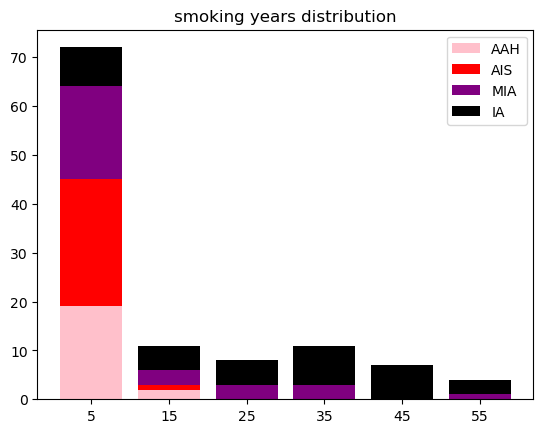

In [7]:
#Smoking years visualisation
type_1_count = np.zeros([6])
type_2_count = np.zeros([6])
type_3_count = np.zeros([6])
type_4_count = np.zeros([6])
for i in range (235):
    if data_smoking_years[i] >= 0:
        if data_type[i] == 1:
            b = int(data_smoking_years[i] // 10)
            type_1_count[b] +=1
        elif data_type[i] == 2:
            b = int(data_smoking_years[i] // 10)
            type_2_count[b] +=1
        elif data_type[i] == 3:
            b = int(data_smoking_years[i] // 10)
            type_3_count[b] +=1
        elif data_type[i] == 4:
            b = int(data_smoking_years[i] // 10)
            type_4_count[b] +=1
    else:
        pass

#print(type_1_count, type_2_count, type_3_count, type_4_count)
columnnames = []
for i in range(6):
    columnnames.append(str(10*(i)+5))
#print(columnnames)
plt.bar(columnnames, type_1_count, bottom=0, color='pink', label = 'AAH')
plt.bar(columnnames, type_2_count, bottom=type_1_count, color='red', label = 'AIS')
plt.bar(columnnames, type_3_count, bottom=type_2_count+type_1_count, color='purple', label = 'MIA')
plt.bar(columnnames, type_4_count, bottom=type_3_count+type_2_count+type_1_count, color='black', label = 'IA')
plt.title('smoking years distribution')
plt.legend()
plt.show()

# Repalce missing data 
use linear regression to replace missing data

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

#import data
datasetpath = 'initialdata.csv'

dataset = pd.read_csv(datasetpath)
datasetfordrop = dataset.copy()                #copy

#do the linear regression with non-empty data
notnanlist = dataset[ (dataset['smoking_years'] >= 0)].index         #find non-empty data
for i in range(datasetfordrop.shape[0]):
    if i not in notnanlist:
        datasetfordrop = datasetfordrop.drop(i)                        #drop the empty data

X = np.vstack((datasetfordrop['age'], datasetfordrop['gender'])).T
y = np.array(datasetfordrop['smoking_years'])
linearregressionmodel = LinearRegression()                            # do linear regression
linearregressionmodel.fit(X, y)

#replace empty data with the results of linear regression
isnonlist = np.where(np.isnan(dataset))[0]                             #find the empty data
for i in isnonlist:
    X_test = np.array([dataset['age'][i], dataset['gender'][i]]).reshape(1, -1)
    y = linearregressionmodel.predict(X_test)                              #calculate linear regression result
    dataset['smoking_years'][i] = y                                         #replace        

dataset.to_csv('supplementeddata.csv', index = False)            #save as another csv
#notice: there is already a copy of this file in the submitted code folder (supplementeddata.csv)

# Import data
Import common libraries and import data

In [6]:
import sklearn 

from sklearn import datasets                
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold               
from sklearn.metrics import accuracy_score                 
from sklearn.metrics import confusion_matrix        
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

#import dataset
datasetpath = 'supplementeddata.csv'
dataset = pd.read_csv(datasetpath)
np.random.seed(233)
dataset = dataset.reindex(np.random.permutation(dataset.index))       #random reindex
X = np.vstack((dataset['lobular_speciticular'], \
               dataset['air_bronchus_sign'], \
               dataset['vessel_passthrough'], \
               dataset['long_diameter'], \
               dataset['avarage_CT_value'], \
               dataset['gender'], \
               dataset['age'], \
               dataset['smoking_years'])).T
y = np.array(dataset['type'])                       #pathologic subtype as y

# Standardization

In [7]:
#data standardization of X
stdsc=StandardScaler()
print('Before standardization:')
print(X[1])
X = stdsc.fit_transform(X)
print('After standardization:')
print(X[1])

Before standardization:
[   0.           0.           0.           7.        -593.
    1.          36.          10.1167777]
After standardization:
[-0.69136634 -0.69136634 -0.83105203 -0.81608034 -0.84183515  1.35326468
 -1.32549188 -0.06141301]


# Define some common functions

In [3]:
'''
#Not needed
def simplepredict(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)   #, random_state=46
    y_pred = model.predict(X_train)
    print(accuracy(y_pred,y_test))
'''

#KFold cross validation of a model on my dataset
def Kfoldpredict(model):
    kf = KFold(5,shuffle=True, random_state=233)                                        #five fold
    currentfold = 1
    averageaccuracy = 0
    globalmatrix = np.zeros([4,4])

    for train_index, validate_index in kf.split(X,y):
        model.fit(X[train_index],y[train_index])
        y_test = y[validate_index]
        y_pred = model.predict(X[validate_index])
        print('current fold:', currentfold)
        currentfold += 1
        print('Accuracy:', accuracy_score(y_test, y_pred))
        globalmatrix = globalmatrix + confusion_matrix(y_test, y_pred)
        averageaccuracy = averageaccuracy  + accuracy_score(y_test, y_pred)
    
    print('avrage accuracy:', averageaccuracy/5)                                                         #print kfold averayge accuracy
    averagedisp = ConfusionMatrixDisplay(confusion_matrix=globalmatrix, display_labels=['AAH','AIS','MIA','IA'])        #kfold global confusion matrix
    averagedisp.plot()
    plt.show()                                                   #show the global confusion matrix


#this function is mostly the same as Kfoldpredict, but here we just need the return value "average accuracy" and do not print anything.
def Kfoldtuning(model):                                
    kf = KFold(5,shuffle=True, random_state=233)
    averageaccuracy = 0

    for train_index, validate_index in kf.split(X,y):
        model.fit(X[train_index],y[train_index])
        y_test = y[validate_index]
        y_pred = model.predict(X[validate_index])
        averageaccuracy = averageaccuracy  + accuracy_score(y_test, y_pred)
        
    return averageaccuracy/5

'''    
#Kfold cross validation with grid search parameter tuning in sklearn. Not used in the code.
def Kfoldgridsearchtuning(model, grid):
    kf = KFold(5,shuffle=True, random_state=233)
    averageaccuracy = 0
    globalmatrix = np.zeros([4,4])
    currentfold = 1         
    
    for train_index, validate_index in kf.split(X,y):
        grid_cv=GridSearchCV(model,grid,cv=5,scoring='accuracy')
        grid_cv.fit(X[train_index],y[train_index])
        y_pred = grid_cv.predict(X[validate_index])
        y_test = y[validate_index]
        print('current fold:', currentfold)   
        currentfold = currentfold+1
        print("tuned hpyerparameters :(best parameters) ", grid_cv.best_params_)
        print(accuracy_score(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
                
        globalmatrix = globalmatrix +confusion_matrix(y_test, y_pred)
        averageaccuracy = averageaccuracy  + accuracy_score(y_test, y_pred)
      
    print('average accuracy:', averageaccuracy/5)                                                        #kfold averayge accuracy
    averagedisp = ConfusionMatrixDisplay(confusion_matrix=globalmatrix, display_labels=['AAH','AIS','MIA','IA'])    #kfold global confusion matrix
    averagedisp.plot()
    plt.show()
'''
    
'''
#Kfold Ramdom Search tuning in sklearn. Not used in the code.
def Kfoldrandomsearchtuning(model, grid):
    kf = KFold(5,shuffle=True, random_state=233)
    averageaccuracy = 0
    globalmatrix = np.zeros([4,4])
    currentfold = 1     
    
    for train_index, validate_index in kf.split(X,y):
        random_cv=RandomizedSearchCV(model,grid,cv=5,scoring='accuracy')
        random_cv.fit(X[train_index],y[train_index])
        y_pred = random_cv.predict(X[validate_index])
        y_test = y[validate_index]
        print('current fold:', currentfold) 
        print("tuned hpyerparameters :(best parameters) ", random_cv.best_params_)
        print(accuracy_score(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        currentfold = currentfold+1
        
        globalmatrix = globalmatrix +confusion_matrix(y_test, y_pred)
        averageaccuracy = averageaccuracy  + accuracy_score(y_test, y_pred)
      
    print('average accuracy:', averageaccuracy/5)                                                               #Kfold average accuracy
    averagedisp = ConfusionMatrixDisplay(confusion_matrix=globalmatrix, display_labels=['AAH','AIS','MIA','IA'])    #kfold global confusion matrix
    averagedisp.plot()
    plt.show()
'''

# Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression

#resemble the grid search in sklearn, try all the combinitions hyperparameters    try C, solver and multiclass
listc = np.logspace(-3,4,8)
listsolver = ['lbfgs', 'newton-cg', 'sag', 'saga']
listmulticlass = ['ovr', 'multinomial']
for itemc in listc:
    for itemsolver in listsolver:
        for itemmulticlass in listmulticlass:
#try all the combinitions of the three mentioned paramters
            logisticregressionmodel1 = LogisticRegression(C=itemc, solver=itemsolver, multi_class = itemmulticlass, max_iter=3000)
            allaccuracy = 0
            for i in range(20):                                    #do 20 iterations and calculate the average. To avoid random error
                allaccuracy += Kfoldtuning(logisticregressionmodel1)
            print(itemc, itemsolver, itemmulticlass, '     allaccuracy:', allaccuracy/20)


0.001 lbfgs ovr      allaccuracy: 0.43212765957446814
0.001 lbfgs multinomial      allaccuracy: 0.47404255319148936
0.001 newton-cg ovr      allaccuracy: 0.4204255319148936
0.001 newton-cg multinomial      allaccuracy: 0.48
0.001 sag ovr      allaccuracy: 0.4219148936170212
0.001 sag multinomial      allaccuracy: 0.4763829787234043
0.001 saga ovr      allaccuracy: 0.4346808510638298
0.001 saga multinomial      allaccuracy: 0.4957446808510639
0.01 lbfgs ovr      allaccuracy: 0.6114893617021276
0.01 lbfgs multinomial      allaccuracy: 0.6312765957446809
0.01 newton-cg ovr      allaccuracy: 0.6221276595744681
0.01 newton-cg multinomial      allaccuracy: 0.6331914893617021
0.01 sag ovr      allaccuracy: 0.623404255319149
0.01 sag multinomial      allaccuracy: 0.6461702127659574
0.01 saga ovr      allaccuracy: 0.6240425531914894
0.01 saga multinomial      allaccuracy: 0.6378723404255318
0.1 lbfgs ovr      allaccuracy: 0.6463829787234044
0.1 lbfgs multinomial      allaccuracy: 0.691914893617

Test with best hyperparameters

current fold: 1
Accuracy: 0.7872340425531915
current fold: 2
Accuracy: 0.8085106382978723
current fold: 3
Accuracy: 0.8723404255319149
current fold: 4
Accuracy: 0.8085106382978723
current fold: 5
Accuracy: 0.9148936170212766
avrage accuracy: 0.8382978723404255


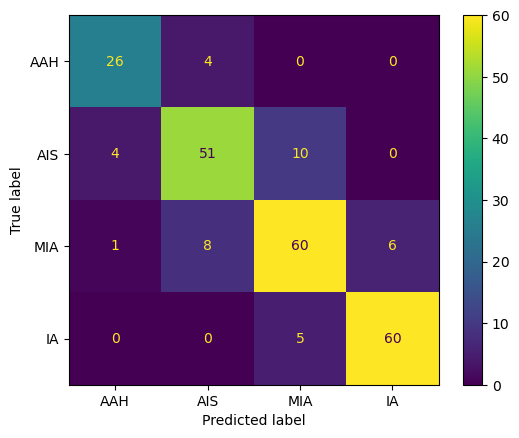

0.8382978723404255

In [11]:
from sklearn.linear_model import LogisticRegression

logisticregressionbestmodel = LogisticRegression(random_state = 233, C=100, multi_class = 'multinomial', max_iter=3000)
Kfoldpredict(logisticregressionbestmodel)

# Support vector machine

In [12]:
from sklearn.svm import SVC  

#try  kernel and C. The process is similar to that in Logistic Regression.
listc = np.logspace(-2, 12, 15)
listkernel = ['linear', 'rbf', 'poly']
for itemc in listc:
    for itemkernel in listkernel:                                    #Try all combinitions of C and kernel as in the lists
        svcmodel1 = SVC(C = itemc, max_iter=30000, kernel=itemkernel)
        allaccuracy = 0
        for i in range(20):                               #20 iterations and calculate average
            allaccuracy += Kfoldtuning(svcmodel1)
        print(itemc, itemkernel, '     allaccuracy:', allaccuracy/20)


0.01 linear      allaccuracy: 0.5744680851063831
0.01 rbf      allaccuracy: 0.2680851063829787
0.01 poly      allaccuracy: 0.2893617021276596
0.1 linear      allaccuracy: 0.7319148936170216
0.1 rbf      allaccuracy: 0.5829787234042556
0.1 poly      allaccuracy: 0.4212765957446808
1.0 linear      allaccuracy: 0.8425531914893616
1.0 rbf      allaccuracy: 0.7148936170212766
1.0 poly      allaccuracy: 0.6553191489361704
10.0 linear      allaccuracy: 0.8127659574468085
10.0 rbf      allaccuracy: 0.8297872340425535
10.0 poly      allaccuracy: 0.774468085106383
100.0 linear      allaccuracy: 0.8170212765957444
100.0 rbf      allaccuracy: 0.774468085106383
100.0 poly      allaccuracy: 0.7404255319148939
1000.0 linear      allaccuracy: 0.7914893617021278
1000.0 rbf      allaccuracy: 0.7659574468085105
1000.0 poly      allaccuracy: 0.7531914893617023
10000.0 linear      allaccuracy: 0.6595744680851063
10000.0 rbf      allaccuracy: 0.7574468085106381
10000.0 poly      allaccuracy: 0.7446808510638

test with best parameters

current fold: 1
Accuracy: 0.851063829787234
current fold: 2
Accuracy: 0.7872340425531915
current fold: 3
Accuracy: 0.8936170212765957
current fold: 4
Accuracy: 0.8723404255319149
current fold: 5
Accuracy: 0.8085106382978723
avrage accuracy: 0.8425531914893616


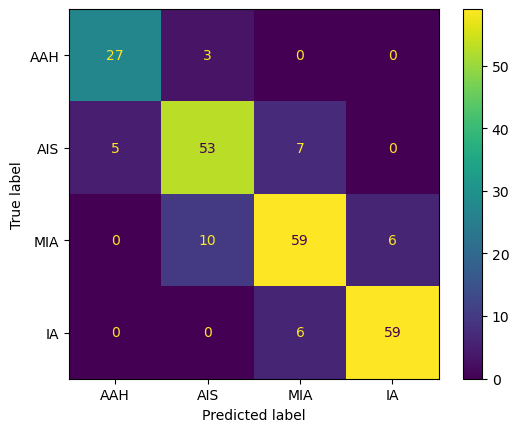

0.8425531914893616

In [89]:
from sklearn.svm import SVC  

svcbestmodel = SVC(random_state = 233, C=20, kernel='linear', max_iter=3000)
Kfoldpredict(svcbestmodel)

# Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

# try the combinitions of criterion, max_features and splitter
listcriterion = ['entropy', 'gini']
listmaxfeatures = [None, 'sqrt', 'log2', 0.01, 1, 5]
listsplitter = ['best', 'random']

for itemcriterion in listcriterion:
    for itemmaxfeatures in listmaxfeatures:
        for itemsplitter in listsplitter:
            decisiontreemodel1 = DecisionTreeClassifier(criterion = itemcriterion, max_features = itemmaxfeatures, splitter = itemsplitter)
            allaccuracy = 0
            for i in range(20):
                allaccuracy += Kfoldtuning(decisiontreemodel1)
            print(itemcriterion, itemmaxfeatures, itemsplitter, '     allaccuracy:', allaccuracy/20)


entropy None best      allaccuracy: 0.7348936170212765
entropy None random      allaccuracy: 0.704468085106383
entropy sqrt best      allaccuracy: 0.662340425531915
entropy sqrt random      allaccuracy: 0.6302127659574468
entropy log2 best      allaccuracy: 0.6927659574468084
entropy log2 random      allaccuracy: 0.6482978723404254
entropy 0.01 best      allaccuracy: 0.6085106382978724
entropy 0.01 random      allaccuracy: 0.5963829787234043
entropy 1 best      allaccuracy: 0.6238297872340427
entropy 1 random      allaccuracy: 0.5953191489361702
entropy 5 best      allaccuracy: 0.7389361702127659
entropy 5 random      allaccuracy: 0.6819148936170215
gini None best      allaccuracy: 0.7372340425531914
gini None random      allaccuracy: 0.6970212765957446
gini sqrt best      allaccuracy: 0.6538297872340426
gini sqrt random      allaccuracy: 0.6112765957446809
gini log2 best      allaccuracy: 0.6921276595744679
gini log2 random      allaccuracy: 0.6472340425531917
gini 0.01 best      alla

'\ndecisiontreemodel = DecisionTreeClassifier()\nKfoldgridsearchtuning(decisiontreemodel, decisiiontreegrid)\n'

Test best decision tree hyperparameters

current fold: 1
Accuracy: 0.7872340425531915
current fold: 2
Accuracy: 0.723404255319149
current fold: 3
Accuracy: 0.7446808510638298
current fold: 4
Accuracy: 0.6808510638297872
current fold: 5
Accuracy: 0.7446808510638298
avrage accuracy: 0.7361702127659575


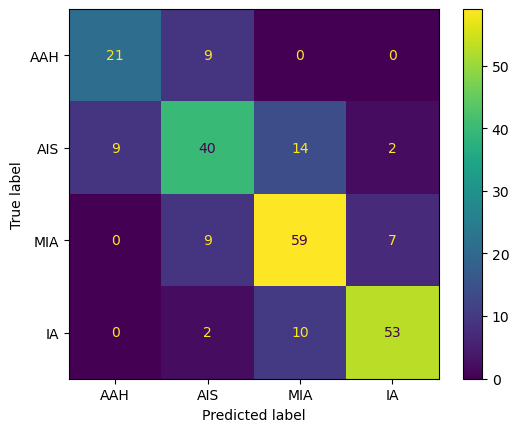

0.7361702127659575

In [16]:
from sklearn.tree import DecisionTreeClassifier

decisiontreebestmodel = DecisionTreeClassifier(random_state = 233, criterion = 'entropy', max_features = None, splitter = 'best')
Kfoldpredict(decisiontreebestmodel)

# Naive Bayesian

In [70]:
from sklearn.naive_bayes import GaussianNB

# only try var_smoothing
listvarsmoothing = np.logspace(0,-9, num=100)
for itemvarsmoothing in listvarsmoothing:
    naivebayesianmodel1 = GaussianNB(var_smoothing = itemvarsmoothing)
    allaccuracy = 0
    for i in range(20):
        allaccuracy += Kfoldtuning(naivebayesianmodel1)
    print(itemvarsmoothing, '     allaccuracy:', allaccuracy/20)

1.0      allaccuracy: 0.6327659574468086
0.8111308307896871      allaccuracy: 0.6397872340425532
0.657933224657568      allaccuracy: 0.6393617021276596
0.533669923120631      allaccuracy: 0.6519148936170214
0.43287612810830584      allaccuracy: 0.6540425531914894
0.3511191734215131      allaccuracy: 0.6612765957446809
0.2848035868435802      allaccuracy: 0.6729787234042554
0.23101297000831597      allaccuracy: 0.671276595744681
0.1873817422860384      allaccuracy: 0.671276595744681
0.15199110829529336      allaccuracy: 0.6765957446808509
0.12328467394420659      allaccuracy: 0.6814893617021276
0.1      allaccuracy: 0.6859574468085106
0.08111308307896872      allaccuracy: 0.6804255319148937
0.0657933224657568      allaccuracy: 0.6814893617021278
0.0533669923120631      allaccuracy: 0.6795744680851064
0.04328761281083057      allaccuracy: 0.684255319148936
0.03511191734215131      allaccuracy: 0.6904255319148938
0.02848035868435802      allaccuracy: 0.6829787234042553
0.02310129700083159

Test best parameters of Bayesian

current fold: 1
Accuracy: 0.7021276595744681
current fold: 2
Accuracy: 0.6382978723404256
current fold: 3
Accuracy: 0.7872340425531915
current fold: 4
Accuracy: 0.8085106382978723
current fold: 5
Accuracy: 0.5319148936170213
avrage accuracy: 0.6936170212765957


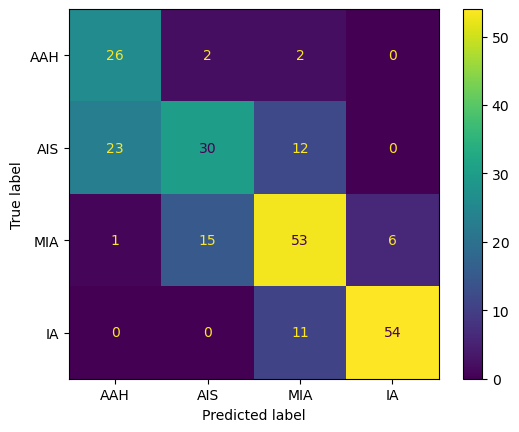

0.6936170212765957

In [18]:
from sklearn.naive_bayes import GaussianNB

naivebayesianbestmodel = GaussianNB(var_smoothing = 0.035)
Kfoldpredict(naivebayesianbestmodel)

# K Nearest Neighbour

In [81]:
from sklearn.neighbors import KNeighborsClassifier

listnneighbors = np.arange(2,15)
listweights =  ['uniform', 'distance']
listp = [1,2,3]

for itemnneighbors in listnneighbors:
    for itemweights in listweights:
        for itemp in listp:
            knnmodel = KNeighborsClassifier(n_neighbors = itemnneighbors, weights = itemweights, p = itemp)
            allaccuracy = 0
            for i in range(20):
                allaccuracy += Kfoldtuning(knnmodel)
            print(itemnneighbors, itemweights, itemp, '     allaccuracy:', allaccuracy/20)


2 uniform 1      allaccuracy: 0.6334042553191488
2 uniform 2      allaccuracy: 0.645744680851064
2 uniform 3      allaccuracy: 0.6446808510638298
2 distance 1      allaccuracy: 0.6657446808510639
2 distance 2      allaccuracy: 0.6753191489361703
2 distance 3      allaccuracy: 0.666595744680851
3 uniform 1      allaccuracy: 0.6691489361702128
3 uniform 2      allaccuracy: 0.6810638297872341
3 uniform 3      allaccuracy: 0.6717021276595745
3 distance 1      allaccuracy: 0.6995744680851065
3 distance 2      allaccuracy: 0.6889361702127659
3 distance 3      allaccuracy: 0.6980851063829788
4 uniform 1      allaccuracy: 0.668936170212766
4 uniform 2      allaccuracy: 0.6672340425531915
4 uniform 3      allaccuracy: 0.6544680851063829
4 distance 1      allaccuracy: 0.6955319148936169
4 distance 2      allaccuracy: 0.7125531914893617
4 distance 3      allaccuracy: 0.6912765957446808
5 uniform 1      allaccuracy: 0.6838297872340426
5 uniform 2      allaccuracy: 0.6893617021276597
5 uniform 3   

"\n\nknngrid={'n_neighbors':np.arange(2,15),  'weights': ['uniform', 'distance'], 'p': [1,2,3]}\nknnmodel = KNeighborsClassifier()\nKfoldgridsearchtuning(knnmodel, knngrid)\n\n"

Test with best parameters

current fold: 1
Accuracy: 0.6382978723404256
current fold: 2
Accuracy: 0.6382978723404256
current fold: 3
Accuracy: 0.723404255319149
current fold: 4
Accuracy: 0.6808510638297872
current fold: 5
Accuracy: 0.8085106382978723
avrage accuracy: 0.6978723404255319


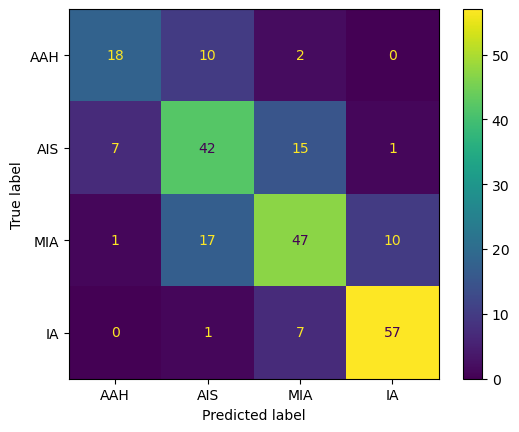

0.6978723404255319

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knnbestmodel = KNeighborsClassifier(weights = 'distance', p = 1)
Kfoldpredict(knnbestmodel)

# Neural Network 
I put Neural network to the last part because it does onehot to y and that will change it

currentfold: 1
Accuracy:  0.7872340425531915
currentfold: 2
Accuracy:  0.9361702127659575
currentfold: 3
Accuracy:  0.9787234042553191
currentfold: 4
Accuracy:  0.9574468085106383
currentfold: 5
Accuracy:  0.9574468085106383
average accuracy: 0.9234042553191489


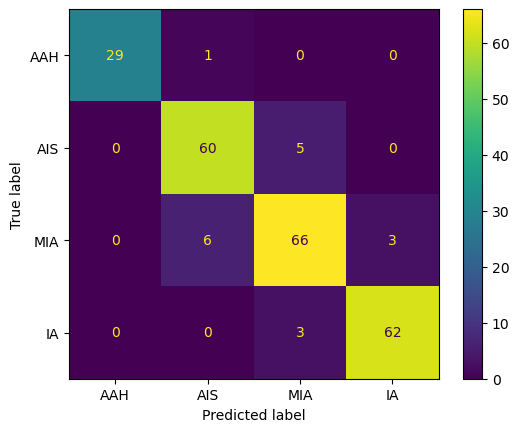

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               900       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 204       
Total params: 6,154
Trainable params: 6,154
Non-trainable params: 0
_________________________________________________________________


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

#transfer the label y to onehot
def onehot(X):                                 
    T = np.zeros((X.size, 4))
    for idx, row in enumerate(T):
        row[X[idx]-1] = 1
    return T

y = onehot(y)

#2 hidden layer with dropout, without regularisation
model_4 = Sequential()
model_4.add(Dense(units=100, input_dim=8, activation='relu'))
model_4.add(Dropout(0.1))
model_4.add(Dense(units=50, activation='relu'))
model_4.add(Dropout(0.1))
model_4.add(Dense(units=4, activation='softmax'))
model_4.compile(loss='categorical_crossentropy', optimizer='adam')

'''
#  with regularisation       not needed
model_5 = Sequential()
model_5.add(Dense(units=100, input_dim=8, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model_5.add(Dropout(0.1))
model_5.add(Dense(units=20, activation='relu'))
model_5.add(Dropout(0.1))
model_5.add(Dense(units=4, activation='softmax'))
model_5.compile(loss='categorical_crossentropy', optimizer='adam')
'''

kf = KFold(5, shuffle = True, random_state = 233)                        #five fold

averageaccuracy = 0
globalmatrix = np.zeros([4,4])
currentfold = 1    
for train, test in kf.split(X):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]

    model_4.fit(X_train,y_train,verbose=0,epochs=3000)

    y_pred = model_4.predict(X_test)
    y_pred_compare = np.argmax(y_pred,axis=1)             #change onehot to readable
    y_test_compare = np.argmax(y_test,axis=1)                #change onehot to readable
    accuracy = accuracy_score(y_test_compare, y_pred_compare)              
    averageaccuracy = averageaccuracy + accuracy
    globalmatrix = globalmatrix + confusion_matrix(y_test_compare, y_pred_compare)

    print('currentfold:', currentfold)
    currentfold = currentfold+1
    print("Accuracy: ", accuracy)

print ('average accuracy:', averageaccuracy/5)           #print the average accuracy

globalmatrixdisp = ConfusionMatrixDisplay(confusion_matrix=globalmatrix, display_labels=['AAH','AIS','MIA','IA'])
globalmatrixdisp.plot()
plt.show()                  #print the global confusion matrix

model_4.summary()            #take a look at the model structure
